In [2]:
import sys
sys.path.append("../src") 
from models.mymodels import mymodel4,mymodel3
import hiddenlayer as hl

In [3]:
model=mymodel3()

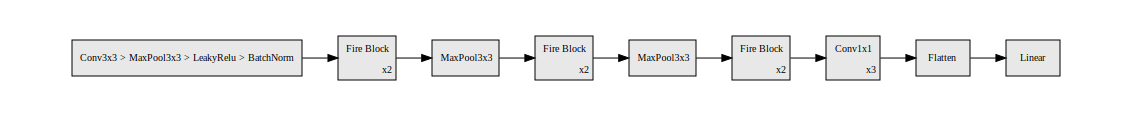

In [16]:
import torch
transforms = [
    # Fold Conv, BN, RELU layers into one
    hl.transforms.Fold("Conv > MaxPool > LeakyRelu >BatchNorm", "ConvMaxPoolRelu"),

    # Fold bottleneck blocks
    hl.transforms.Fold(
        """Conv > Relu > BatchNorm > (Conv | Conv) > Concat > Relu """
       , "Fire Block", "Fire Block"),
    # Fold residual blocks
    hl.transforms.Fold("""Conv > LeakyRelu""",
                       "Conv1x1", "Conv1x1"),
    # Fold repeated blocks
    hl.transforms.FoldDuplicates(),
]

hl.build_graph(model, torch.zeros([1, 1, 224, 224]),transforms=transforms)
